**Installed the necessary Python libraries:**

* kagglehub for downloading datasets from Kaggle.

* tensorflow for building and training the deep learning model.

* matplotlib for visualizations.

* numpy for numerical operations.

In [1]:
# Install required libraries
!pip install kagglehub tensorflow matplotlib numpy

**Imported necessary modules for dataset handling, model building, image
processing, visualization, and machine learning utilities.**

In [2]:
# Import necessary libraries
import kagglehub
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image

**Downloaded the dataset from Kaggle using kagglehub and stored the path where the dataset is saved locally.**

In [3]:
# Download dataset using KaggleHub
path = kagglehub.dataset_download("tanlikesmath/the-oxfordiiit-pet-dataset")
print("Path to dataset files:", path)

100%|██████████| 1.48G/1.48G [00:22<00:00, 70.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tanlikesmath/the-oxfordiiit-pet-dataset/versions/1


**Defined the paths to the images and annotation directories.**

In [4]:
# Dataset paths
images_path = os.path.join(path, "images")
annotations_path = os.path.join(path, "annotations")

**Listed all image files in the dataset and extracted class labels (breeds) from their filenames.**

In [5]:
# Extract class labels from filenames
file_names = os.listdir(images_path)
labels = [name.split("_")[0] for name in file_names if name.endswith(".jpg")]

**Found the unique classes (breeds) in the dataset.**

Separated cat and dog breeds based on the dataset's structure

(assumming the first 12 classes are cats).

Also printed the total number of classes and the count of cat and dog breeds.

In [6]:
# Identify unique classes, cat and dog counts
unique_classes = sorted(set(labels))
cat_breeds = unique_classes[:12]  # First 12 are cats
dog_breeds = unique_classes[12:]  # Remaining are dogs

print(f"Total Classes: {len(unique_classes)}")
print(f"Dog Breeds: {len(dog_breeds)}")
print(f"Cat Breeds: {len(cat_breeds)}")

Total Classes: 35
Dog Breeds: 23
Cat Breeds: 12


**Load dataset and preprocess images**

* Resizes all images to a uniform size of 128x128.

* Normalizes pixel values to the range [0, 1].

* Converts labels to numeric indices for model training.

* Converted the dataset and targeted to NumPy arrays.

* Converted target labels to one-hot encoded vectors.

In [8]:
# Load dataset and preprocess images
image_size = (128, 128)
data, targets = [], []

for file in file_names:
    if file.endswith(".jpg"):
        label = file.split("_")[0]
        image = Image.open(os.path.join(images_path, file)).resize(image_size)
        # Ensure all images are converted to RGB before converting to NumPy array
        image = image.convert('RGB')
        data.append(np.array(image) / 255.0)  # Normalize pixel values
        targets.append(unique_classes.index(label))  # Convert label to index

data = np.array(data)
targets = to_categorical(np.array(targets), num_classes=len(unique_classes))

**Split the dataset**

Splits the dataset into training (80%) and testing (20%) sets.

In [9]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, random_state=42)

**Build the model**

Defined a convolutional neural network (CNN):

* 3 convolutional layers for feature extraction.

* Max-pooling layers to reduce spatial dimensions.

* A fully connected (dense) layer to learn complex patterns.

* Output layer with softmax activation for multi-class classification.

In [10]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(unique_classes), activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Specified:**
*  Optimization algorithm (adam),
*  loss function (categorical_crossentropy), and
*  evaluation metric (accuracy).

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Train the model**

Trained the model using the training set for 10 epochs.

Validates the model on the testing set after each epoch.

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.0498 - loss: 3.5347 - val_accuracy: 0.1218 - val_loss: 3.2606
Epoch 2/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.1483 - loss: 3.0707 - val_accuracy: 0.1664 - val_loss: 3.0040
Epoch 3/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.2486 - loss: 2.6460 - val_accuracy: 0.1847 - val_loss: 2.9591
Epoch 4/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.3829 - loss: 2.1831 - val_accuracy: 0.1928 - val_loss: 3.0518
Epoch 5/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.5454 - loss: 1.5944 - val_accuracy: 0.2064 - val_loss: 3.3453
Epoch 6/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.7285 - loss: 0.9374 - val_accuracy: 0.1976 - val_loss: 4.2718
Epoch 7/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.8658 - loss: 0.4765 - val_accuracy: 0.1962 - val_loss: 5.2151
Epoch 8/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.9379 - loss: 0.2264 - val_accu

**Plot training results**

Plots the training and validation accuracy/loss over epochs to visualize model performance.

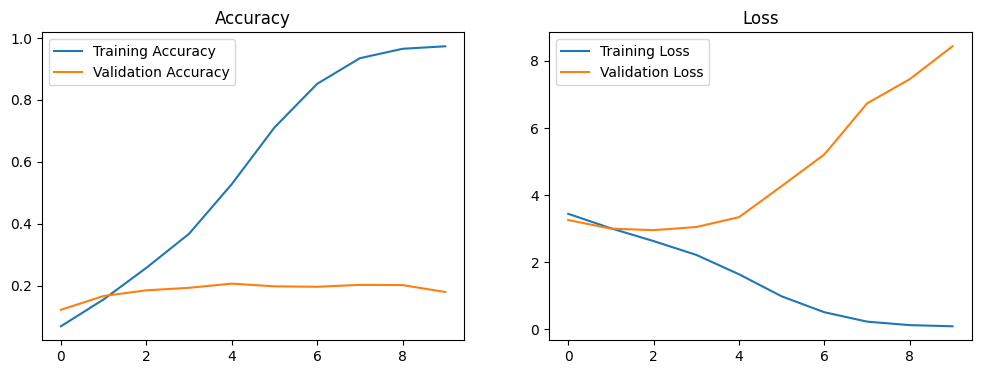

In [13]:
# Plot training results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

**Display sample images with their breed names**

Displays random sample images from the testing set along with their predicted class labels.

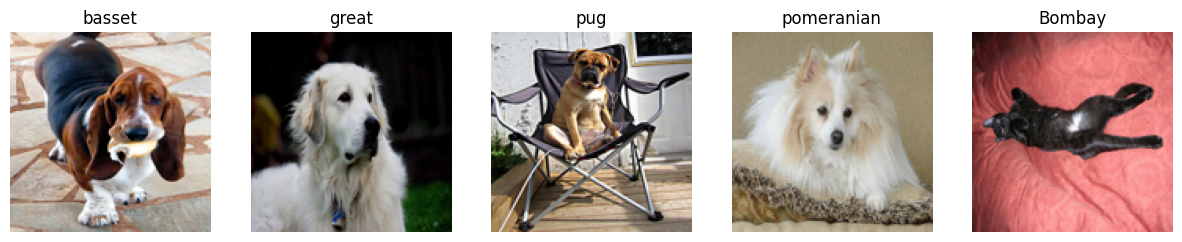

In [20]:
# Display sample images with their breed names
def display_sample_images(num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        idx = np.random.randint(0, len(X_test))
        plt.subplot(1, num_images, i + 1)
        plt.imshow(X_test[idx])
        plt.title(unique_classes[np.argmax(y_test[idx])])
        plt.axis('off')
    plt.show()

display_sample_images()

**Function to predict a new image**

* Takes a new image as input.

* Preprocesses it and predicts the class and whether it’s a cat or dog.

* Displays the image along with the prediction.

In [21]:
# Function to predict a new image
def classify_new_image(image_path):
    image = Image.open(image_path).resize(image_size)
    image_array = np.array(image) / 255.0
    prediction = model.predict(image_array[np.newaxis, ...])
    predicted_class = unique_classes[np.argmax(prediction)]
    cat_or_dog = "Cat" if predicted_class in cat_breeds else "Dog"

    plt.imshow(image)
    plt.title(f"{predicted_class} ({cat_or_dog})")
    plt.axis('off')
    plt.show()

**Example usage: classify a new image**

Eusage to test the model with a new image file (/content/sample.jpg).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


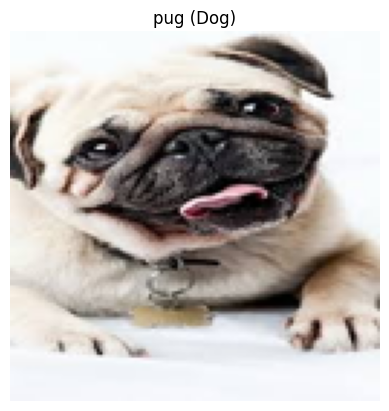

In [22]:
# Example usage: classify a new image
classify_new_image('/content/sample.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


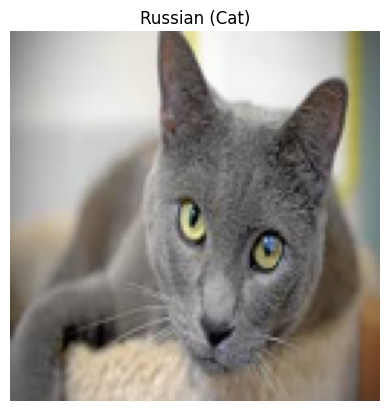

In [26]:
# Example usage: classify a new image
classify_new_image('/content/ex2.jpg')